In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

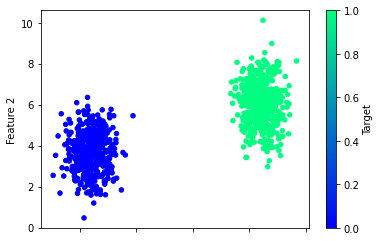

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.9512 - accuracy: 0.0460 
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9449 - accuracy: 0.0519
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8894 - accuracy: 0.0707
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8787 - accuracy: 0.0805
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.0859
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.0665
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.0777
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8172 - accuracy: 0.0904
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8120 - accuracy: 0.1101
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7933 - accuracy: 0.1341
Epoch 11

24/24 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.9112
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.9098
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.9217
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.9471
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.9423
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.9553
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.9459
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.9502
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.9710
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.9558
Epoch 93/100


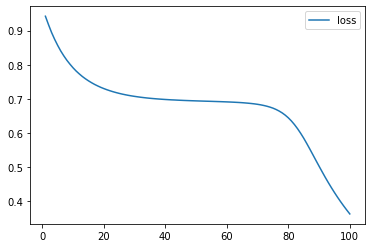

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

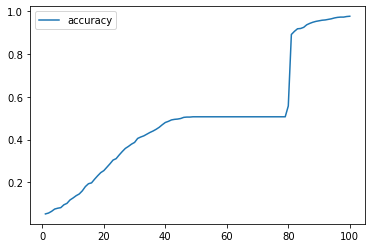

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3509 - accuracy: 0.9880
Loss: 0.350920706987381, Accuracy: 0.9879999756813049


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

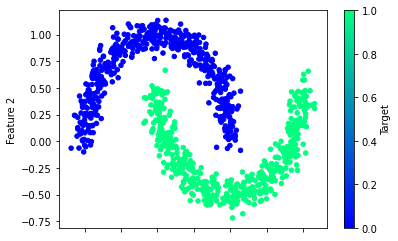

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9825 - accuracy: 0.2893
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9256 - accuracy: 0.2933
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8797 - accuracy: 0.2960
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8458 - accuracy: 0.3120
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8205 - accuracy: 0.3187
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8002 - accuracy: 0.3333
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7837 - accuracy: 0.3400
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7695 - accuracy: 0.3480
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7576 - accuracy: 0.3587
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7477 - accuracy: 0.3733
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.7800
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7800
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.7827
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.7867
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.7893
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7947
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7947
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.7947
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.7960
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.7987
Epoch 93/100


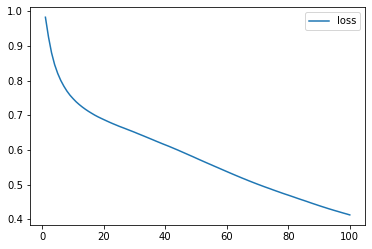

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

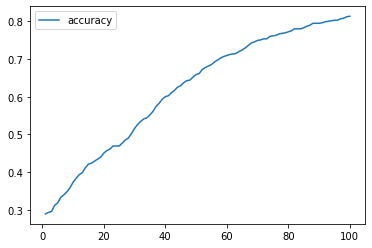

In [20]:
# Plot the loss
history_df.plot(y="accuracy")